In [6]:
from google.colab import files
uploaded = files.upload()

Saving 2023&2024_without_2023_nodate_files(in).csv to 2023&2024_without_2023_nodate_files(in) (1).csv


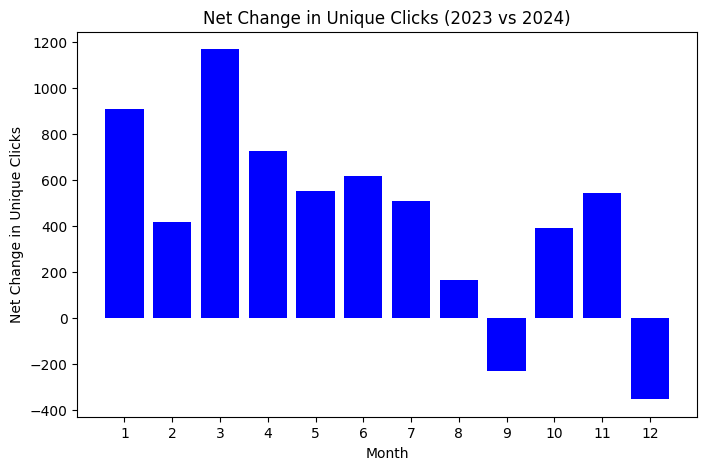

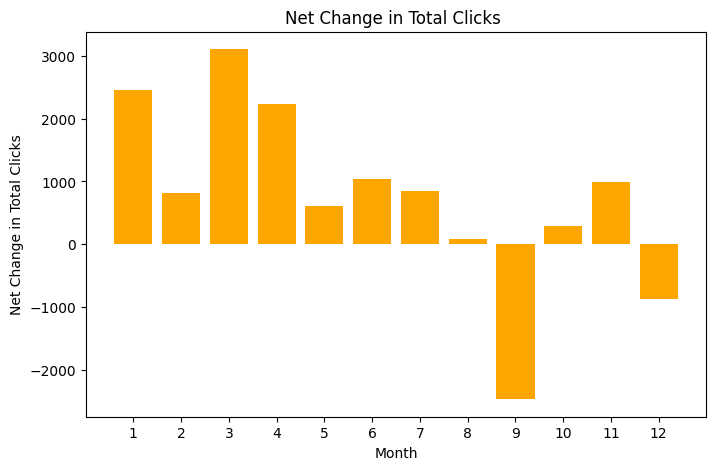

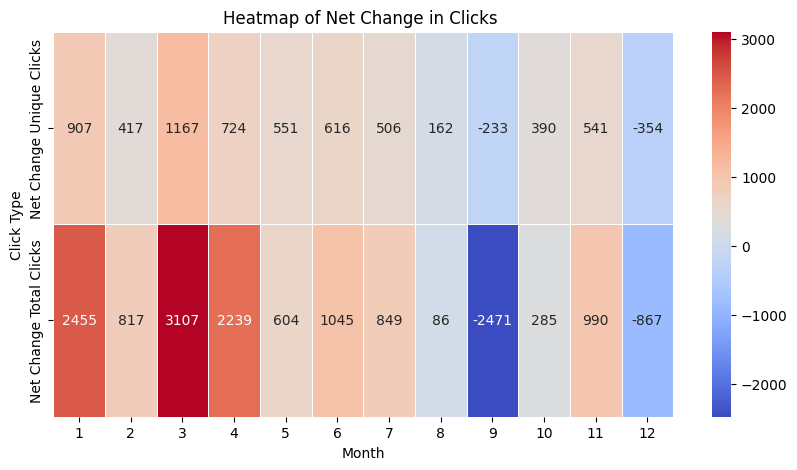

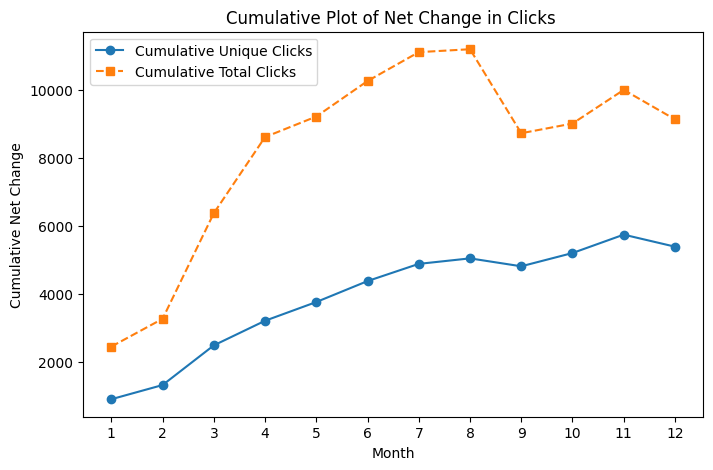

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
file_path = "2023&2024_without_2023_nodate_files(in).csv"
df = pd.read_csv(file_path)

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Aggregate data by year and month
monthly_data = df.groupby(['Year', 'Month'])[['Unique Clicks', 'Total Clicks']].sum().reset_index()

# Create pivot tables
monthly_unique_clicks = monthly_data.pivot(index='Month', columns='Year', values='Unique Clicks').fillna(0)
monthly_total_clicks = monthly_data.pivot(index='Month', columns='Year', values='Total Clicks').fillna(0)

# Calculate the net change for 2024 compared to 2023
if 2023 in monthly_unique_clicks.columns and 2024 in monthly_unique_clicks.columns:
    monthly_unique_clicks['Net Change'] = monthly_unique_clicks[2024] - monthly_unique_clicks[2023]
    monthly_total_clicks['Net Change'] = monthly_total_clicks[2024] - monthly_total_clicks[2023]
else:
    monthly_unique_clicks['Net Change'] = 0
    monthly_total_clicks['Net Change'] = 0

# Generate bar chart for Unique Clicks
plt.figure(figsize=(8, 5))
plt.bar(monthly_unique_clicks.index, monthly_unique_clicks['Net Change'], color="blue")
plt.xlabel("Month")
plt.ylabel("Net Change in Unique Clicks")
plt.title("Net Change in Unique Clicks (2023 vs 2024)")
plt.xticks(range(1, 13))
plt.show()

# Generate bar chart for Total Clicks
plt.figure(figsize=(8, 5))
plt.bar(monthly_total_clicks.index, monthly_total_clicks['Net Change'], color="orange")
plt.xlabel("Month")
plt.ylabel("Net Change in Total Clicks")
plt.title("Net Change in Total Clicks ")
plt.xticks(range(1, 13))
plt.show()

# Generate heatmap for net change in clicks
heatmap_data = pd.DataFrame({
    'Month': range(1, 13),
    'Net Change Unique Clicks': monthly_unique_clicks['Net Change'],
    'Net Change Total Clicks': monthly_total_clicks['Net Change']
}).set_index('Month')

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".0f")
plt.title("Heatmap of Net Change in Clicks ")
plt.xlabel("Month")
plt.ylabel("Click Type")
plt.show()

# Generate cumulative trend plot for net change
months = monthly_unique_clicks.index.values
plt.figure(figsize=(8, 5))
plt.plot(months, np.cumsum(monthly_unique_clicks["Net Change"].values), marker="o", linestyle="-", label="Cumulative Unique Clicks")
plt.plot(months, np.cumsum(monthly_total_clicks["Net Change"].values), marker="s", linestyle="--", label="Cumulative Total Clicks")
plt.xlabel("Month")
plt.ylabel("Cumulative Net Change")
plt.title("Cumulative Plot of Net Change in Clicks ")
plt.xticks(range(1, 13))
plt.legend()
plt.show()
